In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import numpy as np


#Carregando os dados já com cluster
df = pd.read_csv("dados_modelo/cluster_alunos.csv")


#Selecionando as variáveis que serão utilizadas
features = [
    "idade", "semanas_presentes", "perda_peso",
    "total_feedbacks", "media_nota", "cluster"
]
target = "ganho_forca"

X = df[features].fillna(0)
y = df[target].fillna(0)


#Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Criando o modelo de regressão linear (baseline)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Criando o modelo random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#Avaliando o desempenho dos dois modelos
def avaliar_modelo(y_test, y_pred, nome_modelo):
    print(f"\nAvaliação do Modelo: {nome_modelo}")
    print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
    print("R²:", round(r2_score(y_test, y_pred), 3))

avaliar_modelo(y_test, y_pred_lr, "Regressão Linear")
avaliar_modelo(y_test, y_pred_rf, "Random Forest")


#Salvando o Melhor modelo
joblib.dump(rf, "modelo_regressao_forca.pkl")
print("\nModelo Salvo.")

import joblib

#Salvo o modelo
joblib.dump(modelo, "modelo_risco_evasao.pkl")

#Se tudo der certo, vai retornar:
print("Modelo salvo com sucesso.")


Avaliação do Modelo: Regressão Linear
MAE: 75.95
RMSE: 93.74
R²: 0.037

Avaliação do Modelo: Random Forest
MAE: 72.11
RMSE: 91.83
R²: 0.075

Modelo RandomForest Salvo.
Modelo salvo com sucesso.


In [ ]:
#Criando um DF pra comparar valores reais com valores previstos
resultados = pd.DataFrame({
    "Real": y_test,
    "Predito_RF": y_pred_rf
})

print(resultados)

       Real  Predito_RF
1860    8.0      -36.41
353  -129.0      -59.97
1333   56.0       -3.78
905   -76.0        9.77
1289   43.0       30.90
...     ...         ...
965   -32.0     -121.85
1284  -40.0      -39.50
1739   -7.0       17.94
261     5.0       -2.25
535   189.0       69.89

[400 rows x 2 columns]


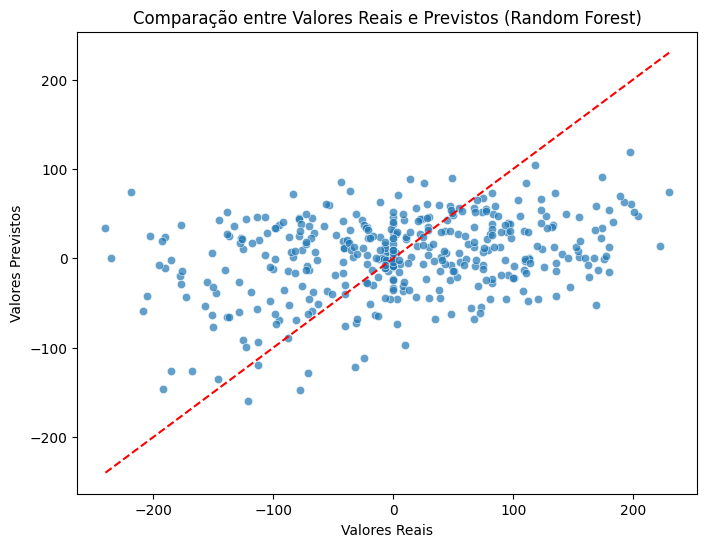

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Real", y="Predito_RF", data=resultados, alpha=0.7)
plt.plot([min(resultados["Real"]), max(resultados["Real"])],
         [min(resultados["Real"]), max(resultados["Real"])], 'r--')
plt.title("Comparação entre Valores Reais e Previstos (Random Forest)")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.show()

In [8]:
from tabulate import tabulate

metrics_table = [
    ["Regressão Linear",
     mean_absolute_error(y_test, y_pred_lr),
     np.sqrt(mean_squared_error(y_test, y_pred_lr)),
     r2_score(y_test, y_pred_lr)],
    
    ["Random Forest",
     mean_absolute_error(y_test, y_pred_rf),
     np.sqrt(mean_squared_error(y_test, y_pred_rf)),
     r2_score(y_test, y_pred_rf)]
]

print(tabulate(metrics_table, headers=["Modelo", "MAE", "RMSE", "R²"], tablefmt="pretty"))

+------------------+-------------------+-------------------+---------------------+
|      Modelo      |        MAE        |       RMSE        |         R²          |
+------------------+-------------------+-------------------+---------------------+
| Regressão Linear | 75.95407250101154 | 93.73753031939553 | 0.03665702379125102 |
|  Random Forest   |     72.105625     | 91.83351939651446 | 0.07539470145098537 |
+------------------+-------------------+-------------------+---------------------+


In [ ]:
# Prevendo o ganho de força de um aluno novo
novo_aluno = pd.DataFrame([{
    "idade": 30,
    "semanas_presentes": 16,
    "perda_peso": 3.0,
    "total_feedbacks": 4,
    "media_nota": 4.2,
    "cluster": 1
}])

modelo = joblib.load("modelo_regressao_forca.pkl")
ganho_previsto = modelo.predict(novo_aluno)[0]
print(f"Ganho de força previsto: {ganho_previsto:.2f} kg")


Ganho de força previsto: 27.68 kg
